<a href="https://colab.research.google.com/github/chitoge729/BE_Project/blob/main/BE_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/chitoge729/Dataset/main/all_fuels_data_2023.csv")

In [ ]:
df.head()

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131


In [ ]:
df.tail()

,ticker,commodity,date,open,high,low,close,volume
27295,BZ=F,Brent Crude Oil,2023-11-03,86.860001,87.779999,84.550003,84.889999,36172
27296,BZ=F,Brent Crude Oil,2023-11-06,85.389999,86.449997,84.910004,85.180000,26524
27297,BZ=F,Brent Crude Oil,2023-11-07,85.230003,85.320000,81.419998,81.610001,38007
27298,BZ=F,Brent Crude Oil,2023-11-08,81.470001,81.930000,79.160004,79.540001,36137
27299,BZ=F,Brent Crude Oil,2023-11-09,79.699997,80.669998,79.610001,80.559998,1009


In [ ]:
df.isnull().sum()

ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

In [ ]:
df.shape

(27300, 8)

In [ ]:
df.describe()

,open,high,low,close,volume
count,27300.000000,27300.000000,27300.000000,27300.000000,2.730000e+04
mean,27.113506,27.503700,26.698357,27.111346,1.056756e+05
std,36.011099,36.465119,35.523887,36.013934,1.492724e+05
min,-14.000000,0.507000,-40.320000,-37.630001,0.000000e+00
25%,2.013000,2.044000,1.981000,2.014275,2.617900e+04
50%,3.420500,3.500000,3.341000,3.419000,4.867900e+04
75%,53.759998,54.602499,52.865001,53.799999,1.131625e+05
max,146.080002,147.429993,144.270004,146.080002,2.288230e+06


<Axes: >

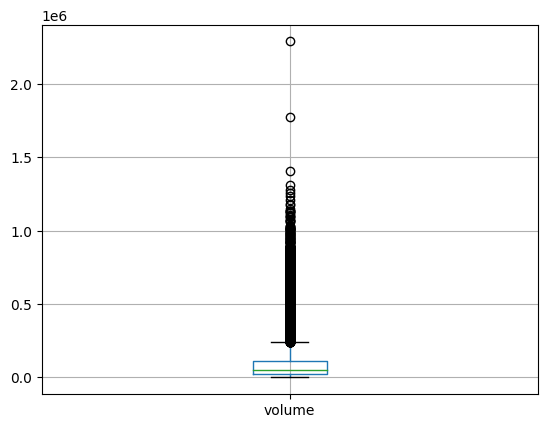

In [ ]:
df.boxplot('volume')

In [ ]:
Q1 = df['volume'].quantile(0.25)
Q3 = df['volume'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

outliers = df[(df['volume']<LL) | (df['volume'])>UL]
df_filtered = df[(df['volume'] >= LL) & (df['volume'] <= UL)]

<Axes: >

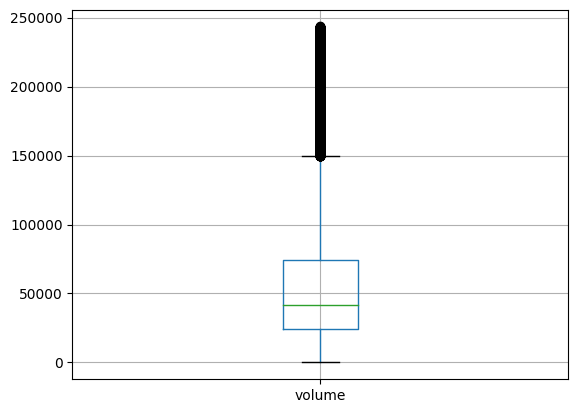

In [ ]:
df_filtered.boxplot('volume')

In [ ]:
SC = StandardScaler()

df_1 = df_filtered[['volume', 'open', 'high', 'low', 'close']]
df_2 = SC.fit_transform(df_1)

In [ ]:
numeric_columns = df_filtered.select_dtypes(include=['number'])

In [ ]:
df_standardized = df_filtered.copy()

In [ ]:
df_standardized[numeric_columns.columns] = SC.fit_transform(numeric_columns)

In [ ]:
df_standardized

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,0.319895,0.333081,0.332685,0.322660,0.401745
1,CL=F,Crude Oil,2000-08-24,0.318396,0.316484,0.316003,0.310076,0.278476
2,CL=F,Crude Oil,2000-08-25,0.312401,0.312334,0.313576,0.322660,-0.267493
3,CL=F,Crude Oil,2000-08-28,0.322592,0.336637,0.329955,0.347230,-0.225762
4,CL=F,Crude Oil,2000-08-29,0.345972,0.339898,0.351188,0.342736,-0.180337
...,...,...,...,...,...,...,...,...
27295,BZ=F,Brent Crude Oil,2023-11-03,1.965728,1.962573,1.928149,1.905907,-0.429666
27296,BZ=F,Brent Crude Oil,2023-11-06,1.921667,1.923154,1.939068,1.914596,-0.615292
27297,BZ=F,Brent Crude Oil,2023-11-07,1.916872,1.889664,1.833209,1.807628,-0.394361
27298,BZ=F,Brent Crude Oil,2023-11-08,1.804172,1.789191,1.764659,1.745604,-0.430339


<Axes: xlabel='volume', ylabel='Count'>

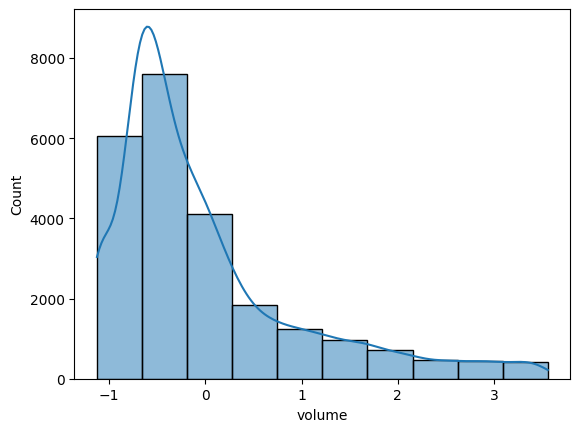

In [ ]:
sns.histplot(df_standardized['volume'], bins=10, kde=True)

<Axes: xlabel='open', ylabel='Count'>

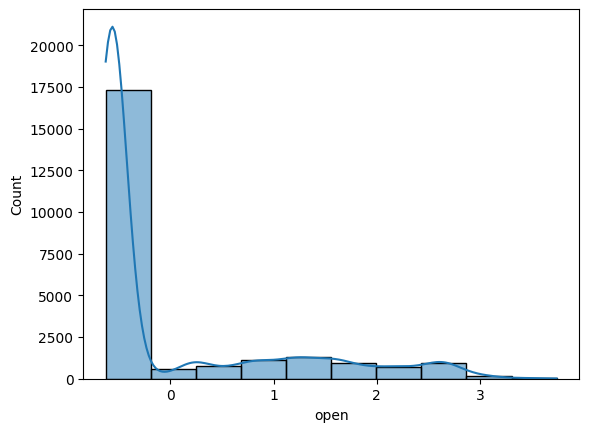

In [ ]:
sns.histplot(df_standardized['open'], bins=10, kde=True)

<Axes: xlabel='high', ylabel='Count'>

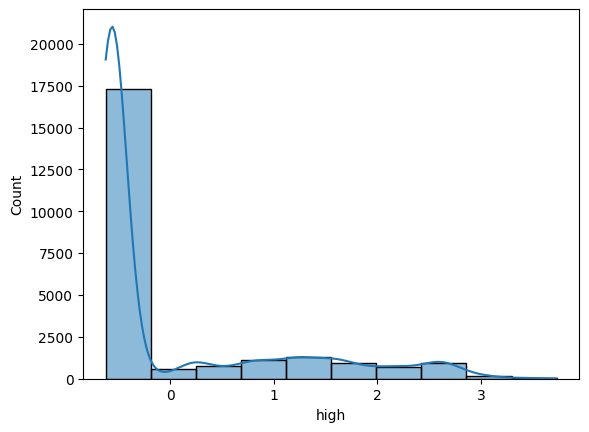

In [ ]:
sns.histplot(df_standardized['high'], bins=10, kde=True)

<Axes: xlabel='low', ylabel='Count'>

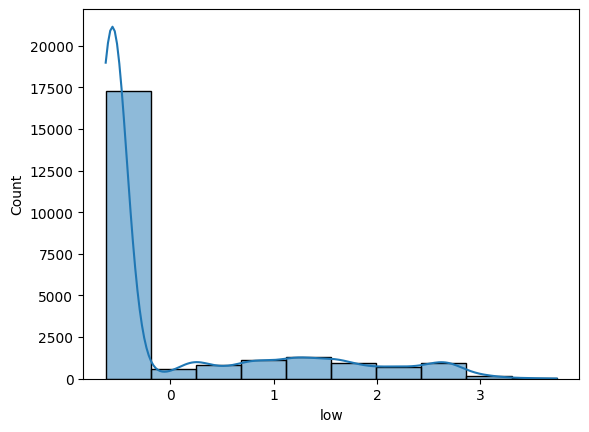

In [ ]:
sns.histplot(df_standardized['low'], bins=10, kde=True)

<Axes: xlabel='close', ylabel='Count'>

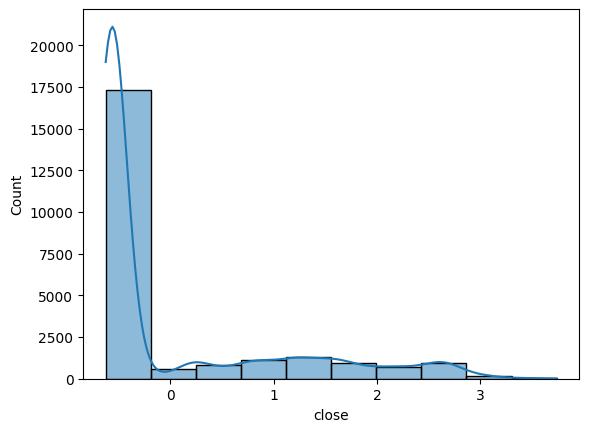

In [ ]:
sns.histplot(df_standardized['close'], bins=10, kde=True)

In [ ]:
df_standardized['date'] = pd.to_datetime(df_standardized['date'])

df_standardized['DayOfWeek'] = df_standardized['date'].dt.dayofweek
df_standardized['Month'] = df_standardized['date'].dt.month
df_standardized['Year'] = df_standardized['date'].dt.year

In [ ]:
df_standardized

,ticker,commodity,date,open,high,low,close,volume,Date,DayOfWeek,Month,Year
0,CL=F,Crude Oil,2000-08-23,0.319895,0.333081,0.332685,0.322660,0.401745,2000-08-23,2,8,2000
1,CL=F,Crude Oil,2000-08-24,0.318396,0.316484,0.316003,0.310076,0.278476,2000-08-24,3,8,2000
2,CL=F,Crude Oil,2000-08-25,0.312401,0.312334,0.313576,0.322660,-0.267493,2000-08-25,4,8,2000
3,CL=F,Crude Oil,2000-08-28,0.322592,0.336637,0.329955,0.347230,-0.225762,2000-08-28,0,8,2000
4,CL=F,Crude Oil,2000-08-29,0.345972,0.339898,0.351188,0.342736,-0.180337,2000-08-29,1,8,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
27295,BZ=F,Brent Crude Oil,2023-11-03,1.965728,1.962573,1.928149,1.905907,-0.429666,2023-11-03,4,11,2023
27296,BZ=F,Brent Crude Oil,2023-11-06,1.921667,1.923154,1.939068,1.914596,-0.615292,2023-11-06,0,11,2023
27297,BZ=F,Brent Crude Oil,2023-11-07,1.916872,1.889664,1.833209,1.807628,-0.394361,2023-11-07,1,11,2023
27298,BZ=F,Brent Crude Oil,2023-11-08,1.804172,1.789191,1.764659,1.745604,-0.430339,2023-11-08,2,11,2023


In [ ]:
label_encoder = LabelEncoder()

df_standardized['Symbol_encoded'] = label_encoder.fit_transform(df_standardized['commodity'])

<ipython-input-63-c29c9e7e6366>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['commodity', 'open', 'high', 'low', 'close', 'volume']].corr()


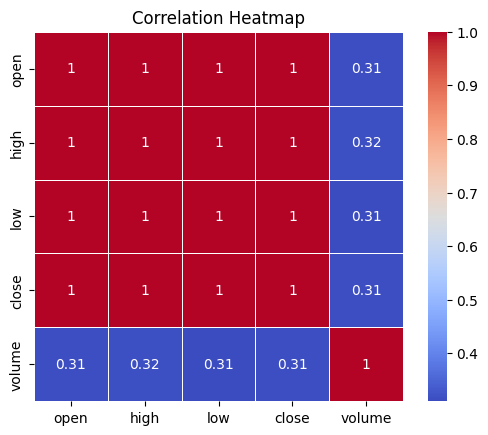

In [ ]:

correlation_matrix = df[['commodity', 'open', 'high', 'low', 'close', 'volume']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)

plt.title('Correlation Heatmap')
plt.show()



In [ ]:
df_standardized['commodity'].unique()

array(['Crude Oil', 'Heating Oil', 'Natural Gas', 'RBOB Gasoline',
       'Brent Crude Oil'], dtype=object)

In [ ]:
df_standardized['commodity'].value_counts()

Heating Oil        5822
RBOB Gasoline      5783
Natural Gas        5692
Brent Crude Oil    4041
Crude Oil          2561
Name: commodity, dtype: int64

Epoch 1/50
299/299 [==============================] - 2s 4ms/step - loss: 0.0022 - val_loss: 5.3041e-04
Epoch 2/50
299/299 [==============================] - 1s 4ms/step - loss: 1.5037e-04 - val_loss: 5.0044e-04
Epoch 3/50
299/299 [==============================] - 1s 4ms/step - loss: 1.2581e-04 - val_loss: 8.1476e-04
Epoch 4/50
299/299 [==============================] - 1s 4ms/step - loss: 1.1046e-04 - val_loss: 4.2245e-04
Epoch 5/50
299/299 [==============================] - 1s 4ms/step - loss: 9.9204e-05 - val_loss: 3.4164e-04
Epoch 6/50
299/299 [==============================] - 1s 5ms/step - loss: 9.0599e-05 - val_loss: 3.0421e-04
Epoch 7/50
299/299 [==============================] - 1s 4ms/step - loss: 8.4479e-05 - val_loss: 3.0565e-04
Epoch 8/50
299/299 [==============================] - 2s 6ms/step - loss: 8.0305e-05 - val_loss: 5.0831e-04
Epoch 9/50
299/299 [==============================] - 2s 6ms/step - loss: 7.7078e-05 - val_loss: 2.9529e-04
Epoch 10/50
299/299 [===========

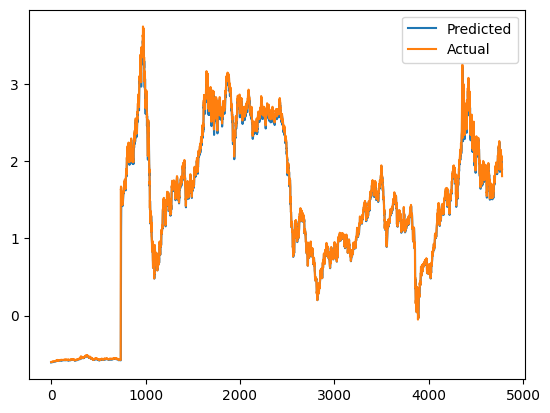

In [ ]:
target_variable = 'open'
target_data = df_standardized[[target_variable]]

scaler = MinMaxScaler()
target_data_scaled = scaler.fit_transform(target_data)

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        sequences.append(seq)
    return np.array(sequences)

sequence_length = 10

sequences = create_sequences(target_data_scaled, sequence_length)

train_size = int(len(sequences) * 0.8)
train_data, test_data = sequences[:train_size], sequences[train_size:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

plt.plot(predictions, label='Predicted')
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.legend()
plt.show()

Epoch 1/50
299/299 [==============================] - 2s 4ms/step - loss: 0.0018 - val_loss: 6.1738e-04
Epoch 2/50
299/299 [==============================] - 1s 4ms/step - loss: 1.3507e-04 - val_loss: 4.3768e-04
Epoch 3/50
299/299 [==============================] - 1s 4ms/step - loss: 1.1899e-04 - val_loss: 4.2309e-04
Epoch 4/50
299/299 [==============================] - 1s 4ms/step - loss: 9.9587e-05 - val_loss: 3.0958e-04
Epoch 5/50
299/299 [==============================] - 2s 5ms/step - loss: 8.7301e-05 - val_loss: 3.2251e-04
Epoch 6/50
299/299 [==============================] - 1s 4ms/step - loss: 8.3725e-05 - val_loss: 2.9964e-04
Epoch 7/50
299/299 [==============================] - 1s 4ms/step - loss: 7.9641e-05 - val_loss: 2.9961e-04
Epoch 8/50
299/299 [==============================] - 1s 4ms/step - loss: 7.7203e-05 - val_loss: 3.0785e-04
Epoch 9/50
299/299 [==============================] - 1s 4ms/step - loss: 7.3569e-05 - val_loss: 2.7560e-04
Epoch 10/50
299/299 [===========

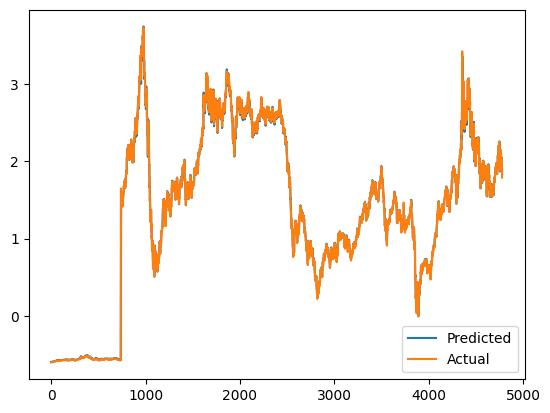

In [ ]:
target_variable = 'high'
target_data = df_standardized[[target_variable]]

scaler = MinMaxScaler()
target_data_scaled = scaler.fit_transform(target_data)

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        sequences.append(seq)
    return np.array(sequences)

sequence_length = 10

sequences = create_sequences(target_data_scaled, sequence_length)

train_size = int(len(sequences) * 0.8)
train_data, test_data = sequences[:train_size], sequences[train_size:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

plt.plot(predictions, label='Predicted')
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.legend()
plt.show()

Epoch 1/50
299/299 [==============================] - 3s 6ms/step - loss: 0.0017 - val_loss: 8.3149e-04
Epoch 2/50
299/299 [==============================] - 1s 5ms/step - loss: 1.5203e-04 - val_loss: 4.6276e-04
Epoch 3/50
299/299 [==============================] - 1s 4ms/step - loss: 1.2154e-04 - val_loss: 0.0010
Epoch 4/50
299/299 [==============================] - 1s 4ms/step - loss: 1.0767e-04 - val_loss: 3.4304e-04
Epoch 5/50
299/299 [==============================] - 1s 4ms/step - loss: 9.5444e-05 - val_loss: 5.8513e-04
Epoch 6/50
299/299 [==============================] - 1s 4ms/step - loss: 8.8539e-05 - val_loss: 3.4386e-04
Epoch 7/50
299/299 [==============================] - 1s 4ms/step - loss: 8.6121e-05 - val_loss: 3.1486e-04
Epoch 8/50
299/299 [==============================] - 1s 4ms/step - loss: 8.4914e-05 - val_loss: 3.0658e-04
Epoch 9/50
299/299 [==============================] - 1s 4ms/step - loss: 7.8932e-05 - val_loss: 3.5937e-04
Epoch 10/50
299/299 [===============

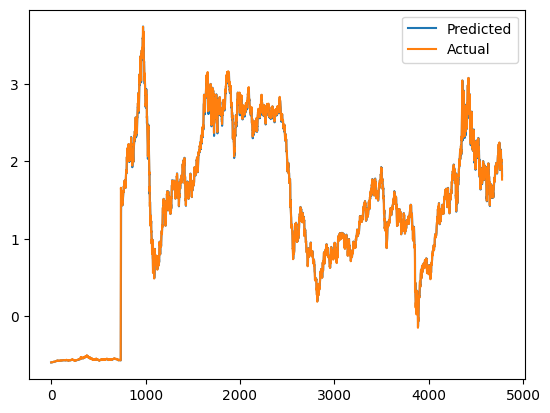

In [ ]:
target_variable = 'low'
target_data = df_standardized[[target_variable]]

scaler = MinMaxScaler()
target_data_scaled = scaler.fit_transform(target_data)

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        sequences.append(seq)
    return np.array(sequences)

sequence_length = 10

sequences = create_sequences(target_data_scaled, sequence_length)

train_size = int(len(sequences) * 0.8)
train_data, test_data = sequences[:train_size], sequences[train_size:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

plt.plot(predictions, label='Predicted')
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.legend()
plt.show()

Epoch 1/50
299/299 [==============================] - 3s 5ms/step - loss: 0.0018 - val_loss: 4.7116e-04
Epoch 2/50
299/299 [==============================] - 2s 5ms/step - loss: 1.3496e-04 - val_loss: 4.0215e-04
Epoch 3/50
299/299 [==============================] - 1s 4ms/step - loss: 1.1999e-04 - val_loss: 4.1678e-04
Epoch 4/50
299/299 [==============================] - 1s 4ms/step - loss: 1.0052e-04 - val_loss: 4.0722e-04
Epoch 5/50
299/299 [==============================] - 1s 4ms/step - loss: 9.2856e-05 - val_loss: 3.1895e-04
Epoch 6/50
299/299 [==============================] - 1s 4ms/step - loss: 8.6373e-05 - val_loss: 3.0926e-04
Epoch 7/50
299/299 [==============================] - 1s 4ms/step - loss: 7.8303e-05 - val_loss: 3.3783e-04
Epoch 8/50
299/299 [==============================] - 2s 5ms/step - loss: 7.6884e-05 - val_loss: 5.2835e-04
Epoch 9/50
299/299 [==============================] - 1s 5ms/step - loss: 7.6549e-05 - val_loss: 2.8471e-04
Epoch 10/50
299/299 [===========

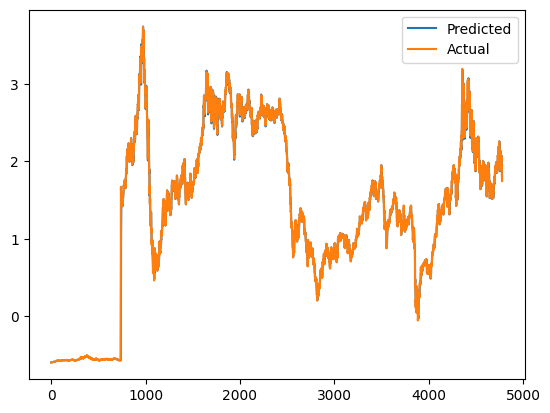

In [ ]:
target_variable = 'close'
target_data = df_standardized[[target_variable]]

scaler = MinMaxScaler()
target_data_scaled = scaler.fit_transform(target_data)

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        sequences.append(seq)
    return np.array(sequences)

sequence_length = 10

sequences = create_sequences(target_data_scaled, sequence_length)

train_size = int(len(sequences) * 0.8)
train_data, test_data = sequences[:train_size], sequences[train_size:]

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

plt.plot(predictions, label='Predicted')
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.legend()
plt.show()